In [92]:
!pip install control #for google colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
import numpy as np
import matplotlib.pyplot as plt
import control

In [94]:
plt.rcParams['figure.figsize'] = [15,8] # size of plots in inches

<h3>Модель ДПТ в пространстве состояний. Модель двигателя 
постоянного тока, без учёта тиристорного выпрямителя </h3>

Входные воздействия: <br> 
*U* - управляющее напряжение <br>
*Mc* – момент сопротивления на валу <br>
Выходные величины: <br>
*R* - активное сопротивление цепи якоря <br>
*Te* - постоянная якорной цепи <br>
*cF* - произведение конструктивной постоянной на номинальный магнитный поток <br>
*J* - приведенный к валу двигателя момент инерции <br>

In [95]:
# Define the parameters
R = 0.12
Te = 0.01
cF = 2.35
J = 95

# Define the state-space model
A = [[-1/Te, -cF/(R*Te)],
     [cF/J, 0]]
B = [[1/(R*Te), 0], 
     [0, -1/J]]
C = [[1, 0],
     [0, 1]]
D = [[0, 0], 
     [0, 0]]
sys = control.StateSpace(A, B, C, D)

# Define the input and initial conditions
t = np.linspace(0, 10, 1001)
t = t[:-1]
U = np.ones(1000)
U[0] = 0
Mc = np.ones(1000)
U[0] = 0
x0 = [0, 0]

In [96]:
# Simulate the model
t, y = control.forced_response(sys, T=t, U=np.stack((U, Mc), axis=0), X0=x0) # y - выход модели 

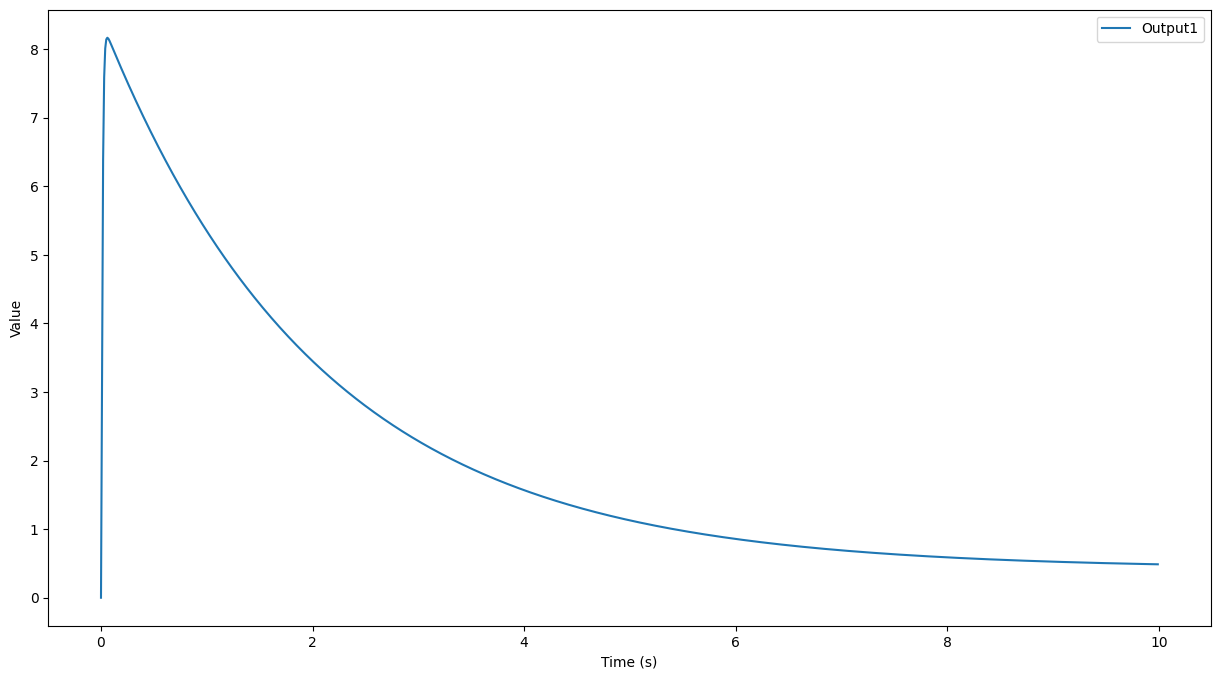

In [97]:
# Plot the results
plt.plot(t, y[0, :], label='Output1')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.show()

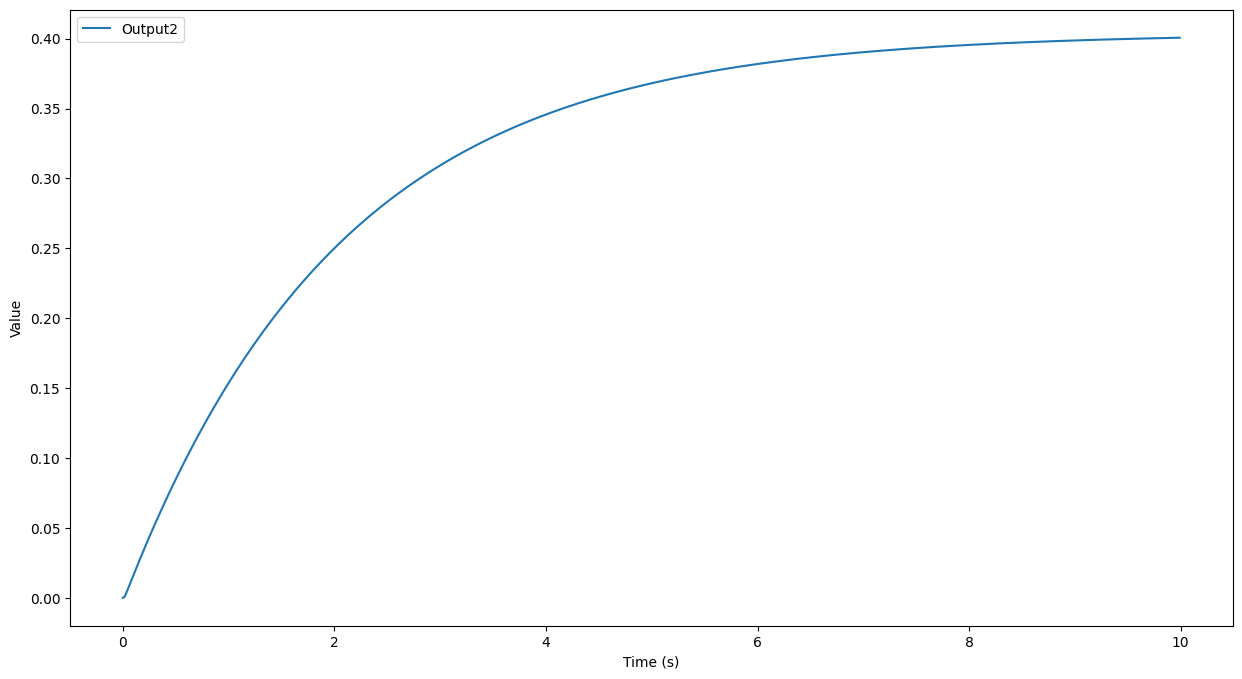

In [98]:
plt.plot(t, y[1, :], label='Output2')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.show()

In [99]:
import tensorflow as tf
from tensorflow import keras

In [100]:
# Set the random seed for reproducibility
tf.random.set_seed(1)

# Define the input shape
input_shape = (2, )

# Define the hidden units for the RNN layer
hidden_units = 2

In [101]:
# Define the model architecture
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=input_shape),
    keras.layers.Reshape((1, input_shape[0])),
    keras.layers.SimpleRNN(hidden_units, activation='sigmoid', return_sequences=True),
])

In [102]:
model.compile(optimizer='adam', loss='binary_crossentropy')

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 1, 2)              0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 1, 2)              10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


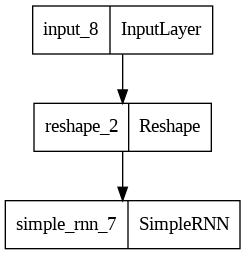

In [103]:
keras.utils.plot_model(model)

In [104]:
X = np.stack([Mc, U], axis=0)
X = np.transpose(X)
y = np.transpose(y)

In [105]:
# Train the model
history = model.fit(X, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 1.0317
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9379
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8477
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7600
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6755
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5951
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5169
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4416
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3688
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.2973


In [106]:
y_pred = model.predict(X)

32/32 [==============================] - 0s 1ms/step


In [107]:
y_pred = y_pred.reshape((1000, 2))

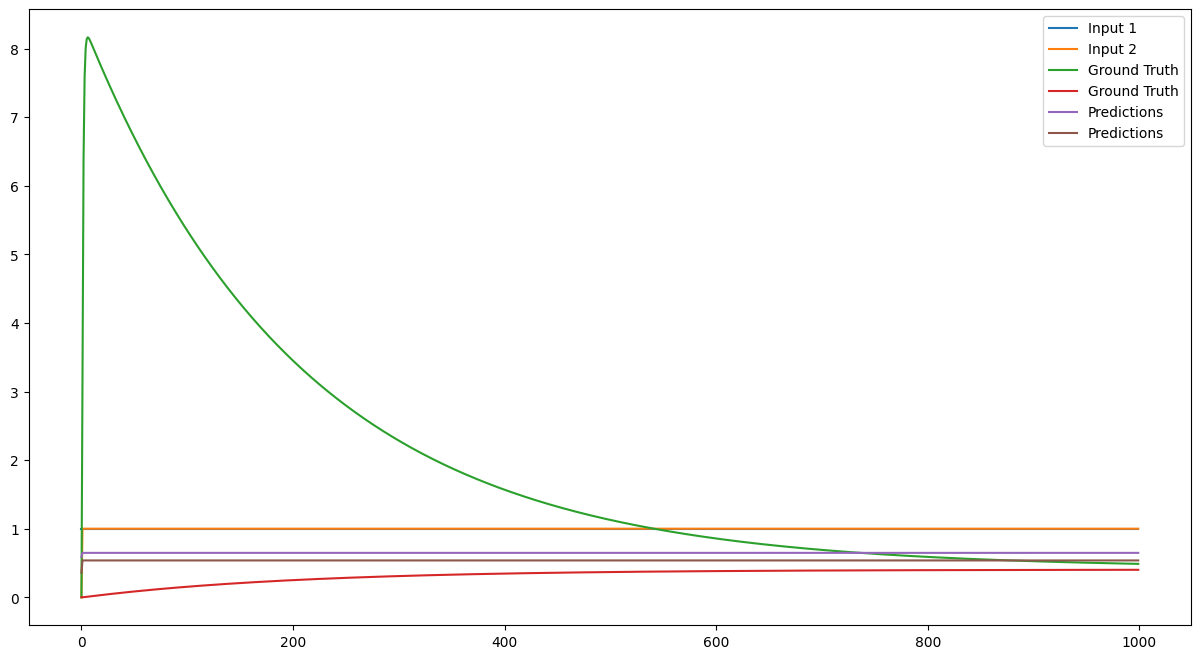

In [108]:
plt.plot(X[:, 0], label="Input 1")
plt.plot(X[:, 1], label="Input 2")
plt.plot(y, label="Ground Truth")
plt.plot(y_pred, label="Predictions")
plt.legend()
plt.show()

In [111]:
weights = model.get_weights()

for i, w in enumerate(weights):
    print(f"Layer {i} weights shape: {w.shape}, and weights: {w}")

Layer 0 weights shape: (2, 2), and weights: [[ 0.06069456 -0.3025383 ]
 [ 0.24556868  0.7310396 ]]
Layer 1 weights shape: (2, 2), and weights: [[-0.9978688   0.06525302]
 [ 0.06525302  0.9978688 ]]
Layer 2 weights shape: (2,), and weights: [ 0.30241576 -0.27879044]


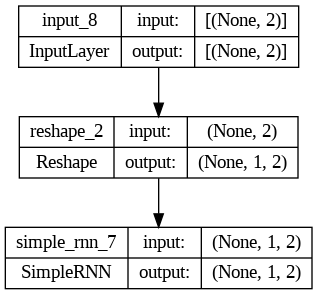

In [113]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)